In [9]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import warnings
from scipy import signal
import pywt
import scaleogram as scg # had to replace np.int to np.int64 in module in order to draw plots.
scg.set_default_wavelet('cmor1-1.5')
# pip install scaleogram
# pip install PyWavelets


The el-Nino dataset is a time-series dataset used for tracking the El Nino and contains quarterly measurements of the sea surface temperature from 1871 up to 1997.

In [2]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
vals = np.array(df_nino.values).flatten()
time = np.linspace(1871,1997, len(vals))

Calculate locally averaged signal using convolution of an averaging kernel: $k =\frac{[1,1,1]}{\sum [1,1,1]} = [1/3,1/3,1/3]$

In [3]:
mean_steps = 10
vals_mean = signal.convolve(vals, np.ones(mean_steps)/mean_steps, mode='valid')
time_mean = signal.convolve(time, np.ones(mean_steps)/mean_steps, mode='valid')

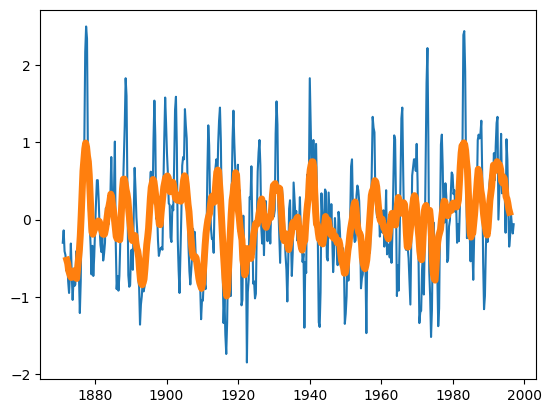

In [4]:
plt.plot(time,vals)
plt.plot(time_mean,vals_mean, lw = 5)

c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


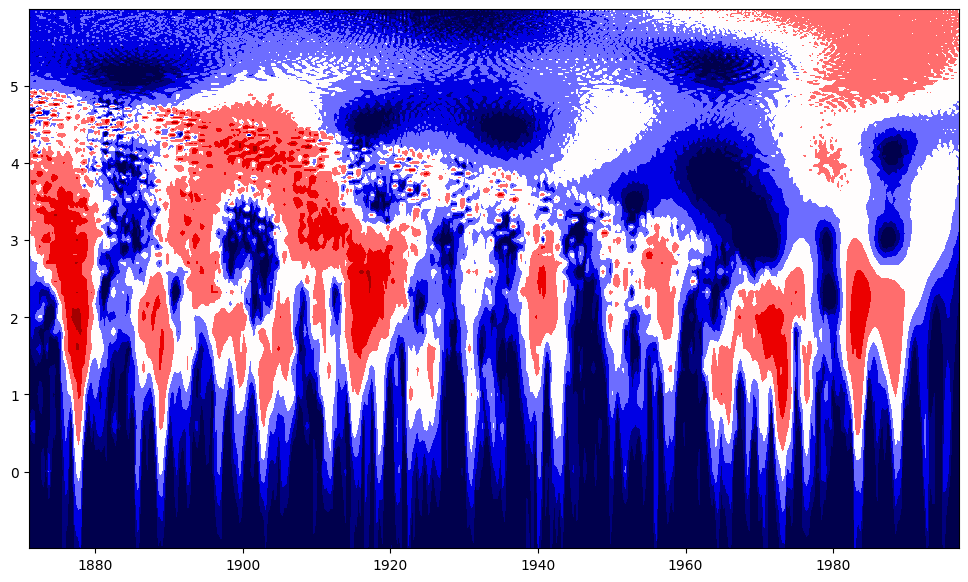

In [5]:
[coefficients, frequencies] = pywt.cwt(vals, np.arange(1, 128), 'cmor', time_mean[1]- time_mean[0])
power = (abs(coefficients)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)

fig, ax = plt.subplots(figsize=(12, 7))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)


Text(0, 0.5, 'freq')

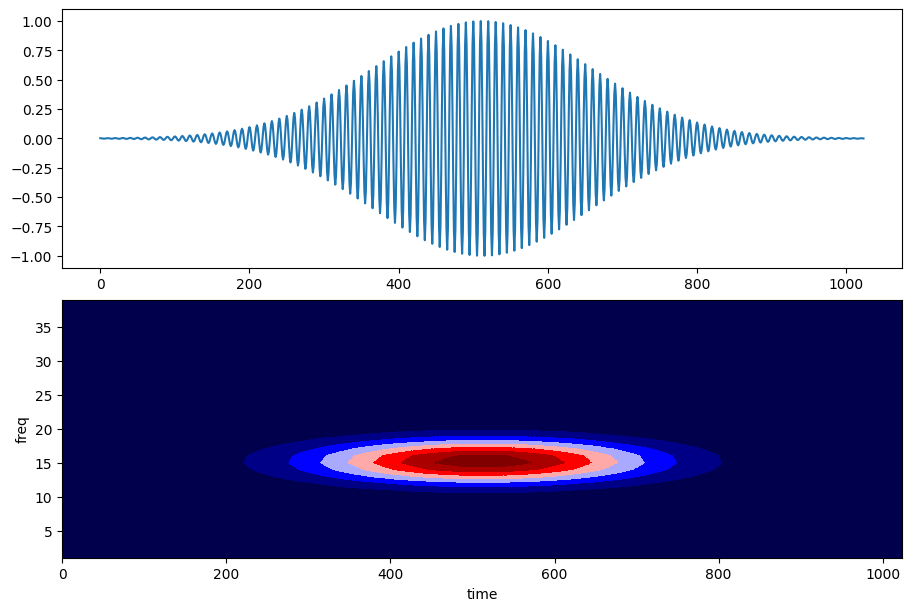

In [31]:
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
ns = 1024
time = np.arange(ns)
scales_max = 40
scales = scg.periods2scales(np.arange(1,scales_max))

period1 = 10;
omega1 = 2*np.pi/period1
gauss_stdev = ns // 5
periodic1 = np.cos(omega1*time) * np.exp(-((time - ns//2)/gauss_stdev)**2)
fig, axes = plt.subplots(2,1, figsize = (9,6), layout='constrained')
axes[0].plot(time, periodic1)

wavelet = 'cmor1-1.5'
scales = np.arange(1,scales_max)
[coefficients, frequencies] = pywt.cwt(periodic1, scales, wavelet, sampling_period=1)

freqs = pywt.scale2frequency(wavelet, scales) / 1
axes[1].contourf(time, scales, np.abs(coefficients),  extend='both',cmap=plt.cm.seismic)
axes[1].set_xlabel('time')
axes[1].set_ylabel('freq')

Text(0, 0.5, 'freq')

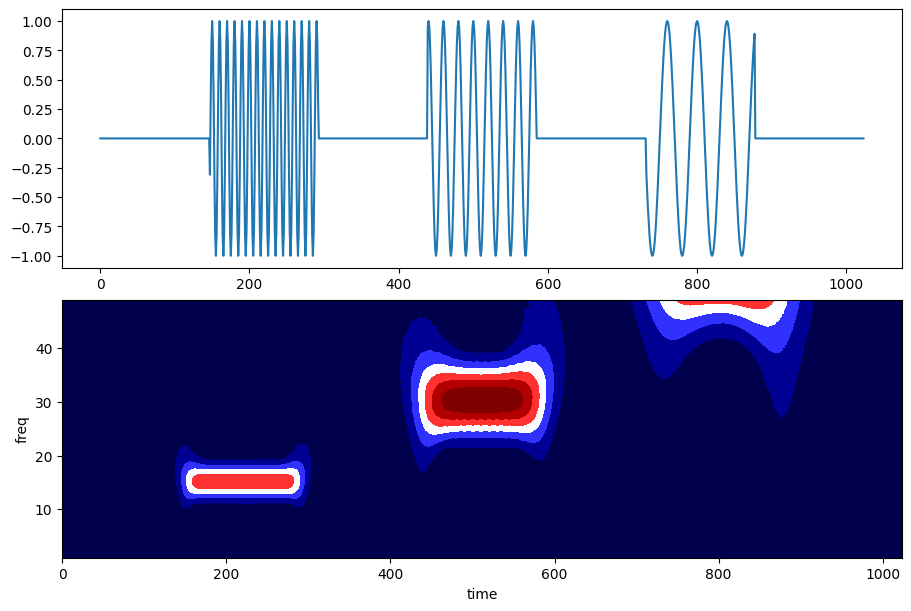

In [46]:
pulses = np.zeros(ns, dtype=np.float32)
steps  = np.linspace(0, ns, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (time > steps[i*2+1]) & (time < steps[i*2+2])
    pulses += np.cos(2*np.pi/periods[i]*time) * step_mask


fig, axes = plt.subplots(2,1, figsize = (9,6), layout='constrained')
axes[0].plot(pulses)
wavelet = 'cmor1-1.5'
scales_max = 50
scales = np.arange(1,scales_max)
[coefficients, frequencies] = pywt.cwt(pulses, scales, wavelet, sampling_period=1)

freqs = pywt.scale2frequency(wavelet, scales) / 1
axes[1].contourf(np.arange(0,ns), scales, np.abs(coefficients),  extend='both',cmap=plt.cm.seismic)
axes[1].set_xlabel('time')
axes[1].set_ylabel('freq')

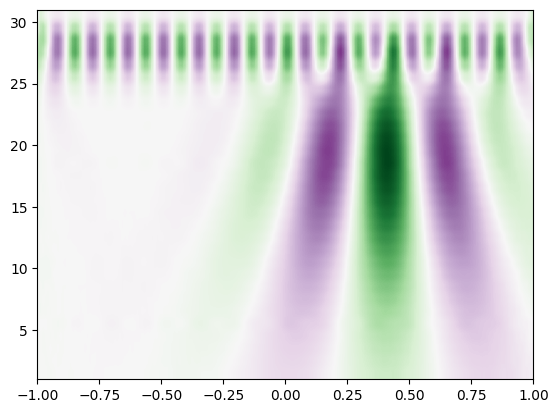

In [44]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 